In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import Accuracy

# Load Dataset


In [ ]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Create a folder in the root directory
!mkdir -p "/content/drive/My Drive/Cat Dog image dataset"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# prompt: import os from google.colab import drive  # Mount Google Drive drive.mount('/content/drive')  # Create a folder in the root directory !mkdir -p "/content/drive/My Drive/Cat Dog image dataset"  i wrote this code to mount my drive but i want to access the files in it how?

# Access the files in your Google Drive
# Replace 'your_file.txt' with the actual file name you want to access
with open('/content/drive/My Drive/Cat Dog image dataset/input.csv', 'r') as f:
  # Read the contents of the file
  contents = f.read()
  # Process the contents as needed
  # ...


In [ ]:
with open('/content/drive/My Drive/Cat Dog image dataset/input_test.csv', 'r') as f:
  # Read the contents of the file
  contents = f.read()

In [ ]:
X_train = np.loadtxt('/content/drive/My Drive/Cat Dog image dataset/input.csv', delimiter =',')
Y_train = np.loadtxt('/content/drive/My Drive/Cat Dog image dataset/labels.csv', delimiter =',')

X_test = np.loadtxt('/content/drive/My Drive/Cat Dog image dataset/input_test.csv', delimiter =',')
Y_test = np.loadtxt('/content/drive/My Drive/Cat Dog image dataset/labels_test.csv', delimiter = ',')

In [ ]:
X_train = X_train.reshape(len(X_train), 100, 100,3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100,3)
Y_test = Y_test.reshape(len(Y_test), 1)

In [ ]:
print('Shape of X_train: ', X_train.shape)
print('Shape of Y_train: ', Y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of Y_test: ', Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


In [ ]:
#we need to divide all the values by 255.0
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

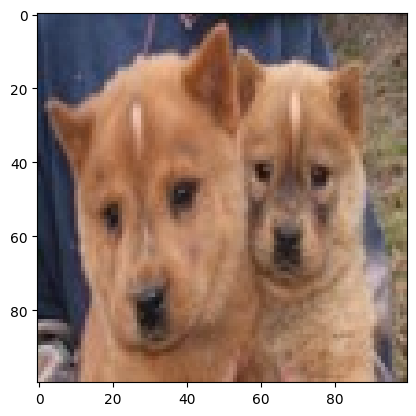

In [ ]:
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model

In [ ]:
model = Sequential([

    Conv2D(32 , (3,3), activation = 'relu', input_shape = (100,100,3)),#32 is the number of filters , and (3,3) is the size so 3X3
    MaxPooling2D((2,2)), # the size of the filter to maxPool 2X2

    Conv2D(32 , (3,3), activation = 'relu'), #we don't have to mention the input shape because it is for the first layer only
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation ='relu'),
    Dense(1, activation = 'sigmoid') # output/final layer should have the same amount of outputs, in our case a binary classification it is sufficient to have 1 neuron, and we use sigmoid because the output should be between 0 and 1
])

In [ ]:
model.compile(loss= 'binary_crossentropy',
              optimizer='Adam' ,
              metrics = ['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs = 5, batch_size=64)

Epoch 1/5
32/32 [==============================] - 22s 683ms/step - loss: 0.3708 - accuracy: 0.8355
Epoch 2/5
32/32 [==============================] - 25s 786ms/step - loss: 0.3036 - accuracy: 0.8790
Epoch 3/5
32/32 [==============================] - 23s 718ms/step - loss: 0.2293 - accuracy: 0.9115
Epoch 4/5
32/32 [==============================] - 28s 887ms/step - loss: 0.1682 - accuracy: 0.9465
Epoch 5/5
32/32 [==============================] - 34s 1s/step - loss: 0.1279 - accuracy: 0.9620


In [ ]:
model.evaluate(X_test,Y_test)

13/13 [==============================] - 1s 88ms/step - loss: 0.8842 - accuracy: 0.6800


[0.8841508626937866, 0.6800000071525574]

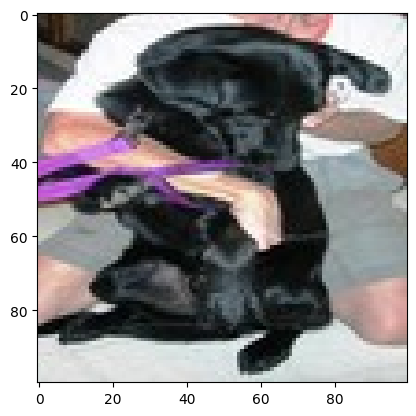

In [ ]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

In [ ]:
y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
#y_pred = y_pred > 0.5

if(y_pred >= 0.500):
    pred = 'cat'
else:
    pred = 'dog'

print("Our model says it is a :", pred)

1/1 [==============================] - 0s 27ms/step
Our model says it is a : dog
